In [2]:
# import library
import pymoo
from pymoo.model.problem import Problem
import pandas
import pycaret
import numpy as np
import math
import matplotlib.pyplot as plt

from pycaret.regression import load_model
#

In [2]:
#"ML_model2_v3_2021_08_12_v1_Lmr"
ML_model_Lmt = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_Lmt") # Lmt model
ML_model_Lmr = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_Lmr") # Lmr model
ML_model_Llt = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_Llt") # Llt model
ML_model_Llr = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_Llr") # Llr model
ML_model_R1 = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_R1") # R1 model
ML_model_R2 = load_model("./model_2021_08_17_v1/ML_model2_v3_2021_08_17_v1_R2") # R2 model

ML_model_Lmtc = load_model("ML_model2_v3_2021_08_12_v1_Lmt_c") # Lmt model
ML_model_Lmrc = load_model("ML_model2_v3_2021_08_12_v1_Lmr_c") # Lmr model
ML_model_Lltc = load_model("ML_model2_v3_2021_08_12_v1_Llt_c") # Llt model
ML_model_Llrc = load_model("ML_model2_v3_2021_08_12_v1_Llr_c") # Llr model
ML_model_R1c = load_model("ML_model2_v3_2021_08_12_v1_R1_c") # R1 model
ML_model_R2c = load_model("ML_model2_v3_2021_08_12_v1_R2_c") # R2 model

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [3]:
#GLOBAL VARS
INPUT_MEANS = [11.52298422039056, 11.456883174462424, 1.250509864774989, 1.2538539126579504, 0, 2.296427822897579, 2.298618931500766, -0.22316660284959997, -0.22387698756574836, 3498.3822575119407, 3.751657665101436, 20.142866427520758, 3.749931581386913, 20.117956611112046, 3.5000719453457, 3.5003074303218167, 13.929453255677942, 42.464752826424295, 52.22957014167389, 59.56812639809758, 5.02519452690933, 4.981609450455427, 33.70174577586959, 32.88914204821819, 0.995559901354316, 5.058896272683628, 5.014498592502798, 4.472254444692369, 58.21624804897175, 57.724760906550095, 0.37850598975131616, 0.3799372194302846, 0.008550744438473683, 0.012024154640011416, 0, 0]
INPUT_STDS = [4.051942143540716, 3.995097310727702, 0.4316337047899765, 0.4294732374156009, 1, 0.6957729777394037, 0.6977392847897756, 9.669547184856619, 9.669288866198748, 864.415584487189, 1.4757152190445155, 5.821673397813458, 1.4760283962164227, 5.824862857828931, 0.8345365926161037, 0.8325621560324485, 3.4611454895181297, 10.451871407488593, 16.258845716118564, 23.037792312255746, 4.547030895189253, 4.568923127681277, 24.953547369232165, 23.935996346040913, 0.0027699777076083173, 4.564224228050054, 4.58539660986043, 3.5122816008824467, 52.61663562827219, 52.86936082709284, 0.20188697414812357, 0.20143747396635506, 0.01081075942750983, 0.015381580408170992, 1, 1]



def preprocess(X, new_feature_names = []):
    #input :        X   : [Batch, 22] shape
    #    new_features   : arr of new feature names 
    #output  Y : [Batch, 29] shape
    #do normalize and add some features

    #Unpack Inputs
    N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1, l2, h1, w1, I1, I2 = np.hsplit(X,22)
    input_arrs = [N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1, l2, h1, w1, I1, I2] # 22

    #Generae Features
    N1s     = N1 ** 2
    N2s     = N2 ** 2
    offset  = abs(offset_tx-offset_rx)
    length1 = N1 * (l1*2 + space1*2 + w1 + space3*2)/2 + N1 * (l1*2 + space1*2 + space5 *2 + w1 + space3*2)/2
    length4 = N2 * (l1*2 + space2*2 + w1 + space4*2)/2 + N2 * (l2*2 + space2*2 + space6 *2 + w1 + space4*2)/2
    window1 = (l1 * 2 + space1 *2) * (w1 + space3 *2)
    window2 = (l1 * 2 + space2 *2) * (w1 + space4 *2)
    from_l2 = l2 - space2 - space5

    new_features_dict = {
        "N1s"       : N1s,
        "N2s"       : N2s,
        "offset"    : offset,
        "length1"   : length1,
        "length4"   : length4,
        "window1"   : window1,
        "window2"  : window2,
        "from_l2"   : from_l2
    }
    #filter by 'new_features'
    new_features_arr = [v for (k,v) in new_features_dict.items() if k in new_feature_names]

    #Standrize 
    normalized_inp = [ (inp-mean)/std  for i,(inp, mean,std) in enumerate(zip(input_arrs, INPUT_MEANS,INPUT_STDS)) ]

    #Merge
    new_model_input = normalized_inp + new_features_arr
    
    #list to np tensor to pandas df
    new_model_input =  np.concatenate(new_model_input,axis=1)
    return pandas.DataFrame(
        new_model_input,
        columns =
            ["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","per","space1","space2","space3","space4","space5","space6","l1", "l2", "h1", "w1", "I1", "I2"] + new_feature_names
        )



def after_process(X, new_feature_names = []):
        #input :        X   : [Batch, 22] shape
    #    new_features   : arr of new feature names 
    #output  Y : [Batch, 29] shape
    #do normalize and add some features

    #Unpack Inputs
    N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1, l2, h1, w1, I1, I2 = np.hsplit(X,22)
    input_arrs = [N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1, l2, h1, w1, I1, I2] # 22

    #Standrize 
    normalized_inp = [ inp*std+mean  for i,(inp, mean,std) in enumerate(zip(input_arrs, INPUT_MEANS,INPUT_STDS)) ]

    #Merge
    new_model_input = normalized_inp
    
    #list to np tensor to pandas df
    new_model_input =  np.concatenate(new_model_input,axis=1)
    return pandas.DataFrame(
        new_model_input,
        columns =
            ["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","per","space1","space2","space3","space4","space5","space6","l1", "l2", "h1", "w1", "I1", "I2"]
        )

    

In [155]:
#inputs
#[[n1, n2, space1, space2, l1, l2, h1, w1]]
# n1 = 1~9
# n2 = 1~9
# space1 = 
# 
# core loss parameter
core_temp = 70

core_a = 0.6942
core_x = 1.4472
core_y = 2.4769
core_b = 4.7948
core_c = 0.0684
core_d = 4e-4
core_LT = core_b - core_c*core_temp + core_d*core_temp**2



class MyProblem(Problem):
    def __init__(self,ML_model_num1,ML_model_num3,ML_model_num6,ML_model_num7):
        super().__init__(n_var=22,     #number of inputs
                         n_obj=2,     #number of outputs
                         n_constr=14,  #nubmer of constraints
                         # N1 N2 d1 d2 freq move_tx move_rx, offset_tx, offset_rx , per, space1, space2, space3, spae4, spae5, space6, l1, l2, h1, w1, I1, I2
                         xl=np.array([6, 8, 1.629, 1.629, 39.99e+3, 2.29,   2.29, -30, -30, 3499.9, 0, 5,  0, 5,  2.29, 2.29, 8,  10, 0,  20,  0.435, 0.316]), #input lower bounds
                         xu=np.array([16, 20, 1.631, 1.631, 40.01e+3, 5,  5, 30, 30,  3501.1,       7, 30, 7, 30, 2.39, 2.39, 20, 60, 80, 100, 0.437, 0.318]))   #input upper bounds
        self.ML_model_Lmt = ML_model_Lmt
        self.ML_model_Lmr = ML_model_Lmr
        self.ML_model_Llt = ML_model_Llt
        self.ML_model_Llr = ML_model_Llr
        self.ML_model_R1 = ML_model_R1
        self.ML_model_R2 = ML_model_R2
        self.ML_model_Lmtc = ML_model_Lmtc
        self.ML_model_Lmrc = ML_model_Lmrc
        self.ML_model_Lltc = ML_model_Lltc
        self.ML_model_Llrc = ML_model_Llrc
        self.ML_model_R1c = ML_model_R1c
        self.ML_model_R2c = ML_model_R2c


# ["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","V1","per","space1","space2","space3","space4","l1", "l2", "h1", "w1", "I1", "I2"]
    def _evaluate(self, X, out, *args, **kwargs):


        N1 = X[:,0]
        N2 = X[:,1]

        freq = 40e+3

        per = X[:,9] * 4 * math.pi * 1e-7

        # unit [m]
        d1 = X[:,2] * 1e-3
        d2 = X[:,3] * 1e-3

        move_tx = X[:,5] * 1e-3
        move_rx = X[:,6] * 1e-3

        offset_tx = X[:,7] * 1e-3
        offset_rx = X[:,8] * 1e-3
 
        space1 = X[:,10] * 1e-3
        space2 = X[:,11] * 1e-3 
        space3 = X[:,12] * 1e-3
        space4 = X[:,13] * 1e-3 
        space5 = X[:,14] * 1e-3
        space6 = X[:,15] * 1e-3 
        l1 = X[:,16] * 1e-3
        l2 = X[:,17] * 1e-3
        h1 = X[:,18] * 1e-3
        w1 = X[:,19] * 1e-3

        I1 = 4.36
        I2 = 3.17

        h11 = (N1/2)*move_tx + 2*d1
        h12 = (N2/2)*move_rx + 2*d2

        
        # Lmt
        f1 = self.ML_model_Lmt.predict( preprocess(X,new_feature_names=["N1s","offset","length1"]) )
        Lmt = f1 * 1e-3 # [unit : mH]
        f1 = f1/10

        # Lmr
        f2 = self.ML_model_Lmr.predict( preprocess(X,new_feature_names=["N2s","offset","length4"]) )
        Lmr = f2 * 1e-3 # [unit : mH]
        f2 = f2/10

        # total volume
        f3 = (h1 + 2*l1)*(4*l1+2*l2)*(w1+space4*2+space6*2+d2)   # Volume [Unit : m^3]

        # coreloss = core_a * freq^core_x * B^core_y * core_LT * V_core;
        V1 = 459.2
        mag_current = V1/(2*3.141592*freq)/Lmt
        Req = N1**2/Lmt
        flux = N1 * mag_current/Req
        B = flux / (2*w1*l1)
        V_core = ((h1 + 2*l1)*(4*l1+2*l2)*(w1) - 2*l2*h1*w1) # Core volue [unit : m^3]
        f4 = core_a * freq**core_x * B**core_y * core_LT * V_core # coreloss [unit : W]

        f5 = self.ML_model_R1.predict( preprocess(X,new_feature_names=["N1s","offset","length1"]) ) * I1**2 
        f6 = self.ML_model_R2.predict( preprocess(X,new_feature_names=["N2s","offset","length4"]) ) * I2**2

        f7 = f4+f5+f6

        f8 = self.ML_model_Llt.predict( preprocess(X,new_feature_names=["offset","length1","length4","window2","from_l2"]) )
        Llt = f8 * 1e-6


        #B = (1/N1)*(V1/2/3.141592/freq//Lmt)*(1/2/w1/l1) # (1/N1)*(V1/2/3.141592/freq//Lmt)*(1/2/w1/l1)

        consta = 10

        #gLmt = (self.ML_model_Lmtc.predict(l2p(X)) - (1-1e-15)) * consta
        #gLmr = (self.ML_model_Lmrc.predict(l2p(X)) - (1-1e-15)) * consta
        #gLlt = (self.ML_model_Lltc.predict(l2p(X)) - (1-1e-15)) * consta
        #gLlr = (self.ML_model_Llrc.predict(l2p(X)) - (1-1e-15)) * consta
        #gR1 = (self.ML_model_R1c.predict(l2p(X)) - (1-1e-15)) * consta
        #gR2 = (self.ML_model_R1c.predict(l2p(X)) - (1-1e-15)) * consta

        gN1 = (N1/2%2 - 0.02)*(N1/2%2 - 0.98) * 0.1

        # Lmt constraint
        g1 = -(f1 - (5.0))
        # Lmr constraint
        g2 = -(Lmr/Lmt*1 - 1.8225)*(Lmr/Lmt*1 - 1.8769)/0.8
        g3 = -(N2/N1*1 - 1.35)*(N2/N1*1 - 1.39)/0.1

        gLlts = -(Llt * 0.9 - 40e-6)*(Llt * 1.1 - 40e-6) * 0.2/5e-6

        # length constraint
        #g3 = -(4*l1+2*l2 - (60e-3+2*space2))*(4*l1+2*l2 - 250*1e-3)

        const = 1

        # height constraint
        g4 = -(h1+2*l1 - ((N1-1)*move_tx+2*d1+10e-3))*(h1+2*l1 - 100e-3)/1e-3/50/const

        # width constraint
        #g5 = -(w1+space2+d2 - (50e-3+d2))*(w1+space2+d2 - (200*1e-3))

        # space constraint
        g6 = -(space1 - (d1/2+d2/2+0e-3))*(space1 - (d1/2+d2/2+5e-3))/1e-3/7/const
        g7 = -(space2 - (d1/2+d2/2+space1+space5+0.66e-3))*(space2 - (d2/2+space1+space5+20e-3))/1e-3/25/const
        g8 = -(space3 - (d1/2+d2/2+0e-3))*(space3 - (d1/2+d2/2+5e-3))/1e-3/7/const
        g9 = -(space4 - (d1/2+d2/2+space3+space6+0.66e-3))*(space4 - (d2/2+space3+space6+20e-3))/1e-3/25/const
        g10 = -(space5 - (d1+d2))*(space5 - (d1+d2+2e-3))/1e-3/5/10/const
        g11 = -(space6 - (d1+d2))*(space6 - (d1+d2+2e-3))/1e-3/5/10/const

        # offset constraint
        g12 = -(offset_tx - (-h1+h11)/2)*(offset_tx - (h1-h11)/2)/1e-3/60/const
        g13 = -(offset_rx - (-h1+h12)/2)*(offset_rx - (h1-h12)/2)/1e-3/60/const

        # core constraint
        g15 = -(l2 - (space2+space5+d2/2+3e-3))*(l2 - 60e-3)/1e-3/10/const
        g16 = -(h1 - h12)*(h1 - 80e-3)/1e-3/10/const


        #g5 = 1*X[:,7] + 1*X[:,3] + d2 - (160) # upper
        #g6 = 1*X[:,7] + 1*X[:,3] + d2 - (50 + d2) # lower0
        # l1 constraint
        #g7 = 1*X[:,4] - (50) # upper
        #g8 = 1*X[:,4] + (5) # lower
        # l2 constraint
        #g9 = 1*X[:,5] - (100) # upper
        #g10 = 1*X[:,5] + (1*X[:,3] + 20) # lower
        # h1 constraint
        #g11 = 1*X[:,6] - (200) # upper
        #g12 = 1*X[:,6] + (math.ceil((max(1*X[:,0],1*X[:,1])-1)*move_tx+2*d1)) # lower
        # w1 constraint
        #g13 = 1*X[:,7] - (200) # upper
        #g14 = 1*X[:,7] + (30) # lower
        # space1 constraint
        #g15 = 1*X[:,2] - (math.ceil(1*X[:,3]-d1-2)) # upper
        #g16 = 1*X[:,2] + (5) # lower
        # space2 constraint
        #g17 = 1*X[:,3] - (60) # upper
        #g18 = 1*X[:,3] + (20) # lower
        # N1 constraint
        #g19 = 1*X[:,1] // 1
        #g20 = 1*X[:,1] 


        #8.99995216e+00, 3.61173668e+00, 6.44412190e+01, 1.53430249e+01


        out["F"] = np.column_stack([f3, f7]) # "Minimize" values (volume, coreloss)
        out["G"] = np.column_stack([gN1,g2,g3,g4,g6,g7,g8,g9,g12,g13,g15,g16,f1,f2]) # > 0 Constraints
        out["G"] = - out["G"] # Actually < 0 
        out["H"] = np.column_stack([N1,N2,l1,l2,h1,w1,space1,space2,space3,space4,space5,space6,move_tx,move_rx,offset_tx,offset_rx])

problem = MyProblem(ML_model_Lmt, ML_model_Lmr, ML_model_R1, ML_model_R2)

In [156]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=150,
    n_offsprings=20, # 10
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15), #Simulated Binary Crossover
    mutation=get_mutation("real_pm", eta=40),
    eliminate_duplicates=True
)

In [157]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 3000)

In [158]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=False,
               verbose=True)
res

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     150 |  0.001881428 |  4.846059983 |       1 |            - |            -
    2 |     170 |  0.001881428 |  2.295549335 |       1 |  0.00000E+00 |            f
    3 |     190 |  0.001881428 |  1.496064926 |       1 |  0.00000E+00 |            f
    4 |     210 |  0.001881428 |  1.088627571 |       1 |  0.00000E+00 |            f
    5 |     230 |  0.001881428 |  0.791818653 |       1 |  0.00000E+00 |            f
    6 |     250 |  0.001881428 |  0.586883415 |       1 |  0.00000E+00 |            f
    7 |     270 |  0.001881428 |  0.417497587 |       1 |  0.00000E+00 |            f
    8 |     290 |  0.001510519 |  0.309855678 |       1 |  3.91317E+01 |        ideal
    9 |     310 |  0.001510519 |  0.238673329 |       1 |  0.00000E+00 |            f
   10 |     330 |  0.001510519 |  0.181857547 |       1 |  0.00000E+00 |            f
   11 |     350 |  0.001510519 |  0.149189296 |       

KeyboardInterrupt: 

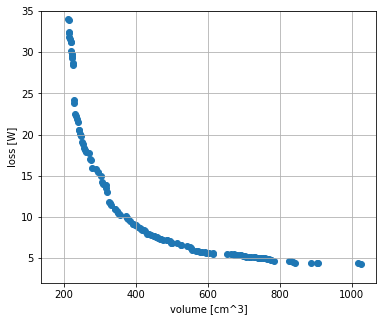

In [146]:
import matplotlib.pyplot as plt

plt.scatter(res.F[:,0]*1e+6, res.F[:,1])
plt.xlabel("volume [cm^3]")
plt.ylabel("loss [W]")
plt.grid(True)
plt.ylim(2, 35)

plt.rcParams["figure.figsize"] = (6,5)

In [147]:
# parameter calcaultion


freq = 40e+3


I1 = 4.36
I2 = 3.17

core_temp = 70

core_a = 0.6942
core_x = 1.4472
core_y = 2.4769
core_b = 4.7948
core_c = 0.0684
core_d = 4e-4
core_LT = core_b - core_c*core_temp + core_d*core_temp**2

Lmt = ML_model_Lmt.predict( preprocess(res.X,new_feature_names=["N1s","offset","length1"]) )
Lmr = ML_model_Lmr.predict( preprocess(res.X,new_feature_names=["N2s","offset","length4"]) )
Llt = ML_model_Llt.predict( preprocess(res.X,new_feature_names=["offset","length1","length4","window2","from_l2"]) )
Llr = ML_model_Llr.predict( preprocess(res.X,new_feature_names=["offset","length1","length4","window2","from_l2"]) )
R1 = ML_model_R1.predict( preprocess(res.X,new_feature_names=["N1s","offset","length1"]) )
R2 = ML_model_R2.predict( preprocess(res.X,new_feature_names=["N2s","offset","length4"]) )

N1 = res.X[:,0]
N2 = res.X[:,1]
req = res.X[:,4]
l1 = res.X[:,16]*1e-3
l2 = res.X[:,17]*1e-3
h1 = res.X[:,18]*1e-3
w1 = res.X[:,19]*1e-3

V1 = 459.2

mag_current = V1/(2*3.141592*freq)/Lmt
Req = N1**2/Lmt
flux = N1 * mag_current/Req
B = flux / (2*w1*l1)
V_core = ((h1 + 2*l1)*(4*l1+2*l2)*(w1) - 2*l2*h1*w1) # Core volue [unit : m^3]
sol_coreloss = core_a * freq**core_x * B**core_y * core_LT * V_core # coreloss [unit : W]

sol_copperloss_tx = R1 * I1**2
sol_copperloss_rx = R2 * I2**2




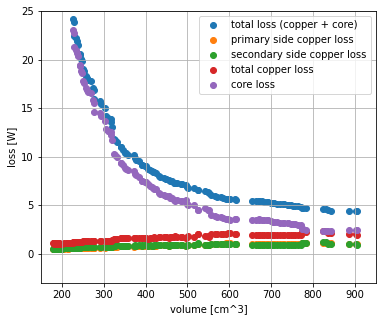

In [154]:
# plot copper loss

plt.scatter(res.F[:,0]*1e+6, res.F[:,1])
plt.scatter(res.F[:,0]*1e+6, sol_copperloss_tx)
plt.scatter(res.F[:,0]*1e+6, sol_copperloss_rx)
plt.scatter(res.F[:,0]*1e+6, sol_copperloss_tx+sol_copperloss_rx)
plt.scatter(res.F[:,0]*1e+6, sol_coreloss)
plt.xlabel("volume [cm^3]")
plt.ylabel("loss [W]")
plt.grid(True)

plt.legend(["total loss (copper + core)","primary side copper loss","secondary side copper loss","total copper loss","core loss"])
plt.ylim(-3, 25)
plt.xlim(150, 950)

plt.rcParams["figure.figsize"] = (6,5)

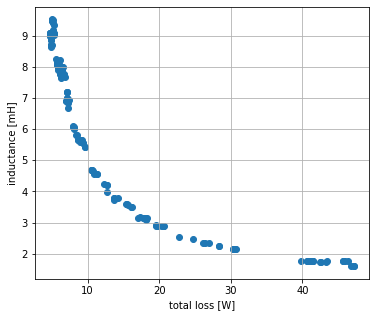

In [78]:
data_Lmt = pandas.DataFrame(Lmt,columns=["Lmt"])
data_F0 = pandas.DataFrame(res.F[:,0],columns=["total_volume"])
data_F1 = pandas.DataFrame(res.F[:,1],columns=["total_loss"])

data_Lmt_copper = pandas.concat([data_Lmt,data_F0,data_F1],axis=1)
data_Lmt_copper = data_Lmt_copper[data_Lmt_copper['total_loss']<5000].reset_index(drop=True)

#plt.scatter(data_Lmt_copper['total_volume']*1e+6, data_Lmt_copper['total_loss'])
plt.scatter(data_Lmt_copper['total_loss'], data_Lmt_copper['Lmt'])

plt.xlabel("total loss [W]")
plt.ylabel("inductance [mH]")
plt.grid(True)

plt.rcParams["figure.figsize"] = (6,5)

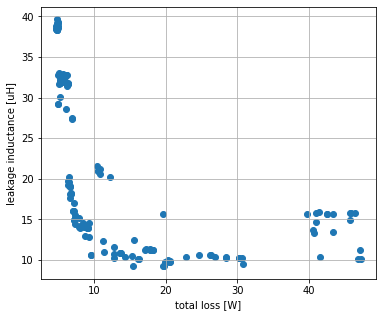

In [68]:
data_Llt = pandas.DataFrame(Llt*1e+6,columns=["Llt"])
data_F0 = pandas.DataFrame(res.F[:,0],columns=["total_volume"])
data_F1 = pandas.DataFrame(res.F[:,1],columns=["total_loss"])

data_Llt_copper = pandas.concat([data_Llt,data_F0,data_F1],axis=1)
data_Llt_copper = data_Llt_copper[data_Llt_copper['total_loss']<5000].reset_index(drop=True)

#plt.scatter(data_Lmt_copper['total_volume']*1e+6, data_Lmt_copper['total_loss'])
plt.scatter(res.F[:,1], Llt)

plt.xlabel("total loss [W]")
plt.ylabel("leakage inductance [uH]")
plt.grid(True)

plt.rcParams["figure.figsize"] = (6,5)

array([16.68511993,  2.90684407,  3.25510407,  3.95388008, 15.95144007,
       17.71200829,  4.72157965,  4.51907603,  5.28208541,  6.98203726,
        4.21820664,  3.95388008,  3.24119543,  3.24703441, 17.02559359,
        4.30569082,  4.30569082, 12.67836833, 15.25308725, 10.67500854,
        7.06846154, 11.17067053,  7.27780192,  8.62929514,  8.49316305,
        7.82508276,  4.21820664, 15.08200867,  5.84588766,  6.60704163,
        8.55274275,  5.74335682,  6.38651841,  7.84748499,  6.88873186,
        5.36211329, 11.10328157,  7.84748499, 15.08200867, 10.61034328,
       10.44268912,  3.24703441, 10.1140533 ,  5.84588766, 16.84586391,
        8.55274275,  3.24119543, 16.84586391,  3.24119543,  2.90684407,
        5.78847887,  3.25510407, 10.51094445,  5.32720745,  3.24119543,
       16.89162828,  6.58219018,  3.24119543,  4.30569082, 14.92531669,
        5.28208541, 14.59503196, 15.95144007, 10.38404702, 14.76576912,
        3.24703441, 16.20977917,  6.3870584 , 14.64332261, 14.64

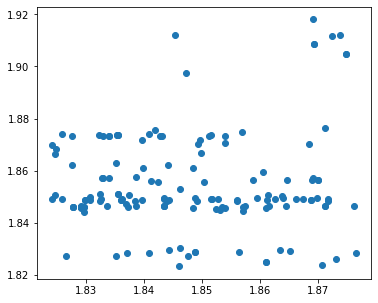

In [69]:
#plt.scatter(res.F[:,0]*1e+6, Lmr/Lmt)
plt.scatter((Lmr/Lmt), (N2/N1)**2)

Lmr

In [72]:
#data Save

data_X = pandas.DataFrame(res.X,columns=["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","per","space1","space2","space3","space4","space5","space6","l1", "l2", "h1", "w1", "I1", "I2"])
data_F0 = pandas.DataFrame(res.F[:,0]*1e+6,columns=["volume"])
data_F1 = pandas.DataFrame(res.F[:,1],columns=["total_loss"])
data_Lmt = pandas.DataFrame(Lmt*1e+3,columns=["Lmt"])
data_Lmr = pandas.DataFrame(Lmr*1e+3,columns=["Lmr"])
data_Llt = pandas.DataFrame(Llt*1e+6,columns=["Llt"])
data_Llr = pandas.DataFrame(Llr*1e+6,columns=["Llr"])
data_R1 = pandas.DataFrame(R1,columns=["R1"])
data_R2 = pandas.DataFrame(R2,columns=["R2"])
data_copperloss_tx = pandas.DataFrame(sol_copperloss_tx,columns=["copperloss_tx"])
data_copperloss_rx = pandas.DataFrame(sol_copperloss_rx,columns=["copperloss_rx"])
data_copperloss = pandas.DataFrame(sol_copperloss_tx+sol_copperloss_rx,columns=["copperloss"])
data_coreloss = pandas.DataFrame(sol_coreloss,columns=["coreloss"])
savedata = pandas.concat([data_X,data_F0,data_F1,data_Lmt,data_Lmr,data_Llt,data_Llr,data_R1,data_R2,data_copperloss_tx,data_copperloss_rx,data_copperloss,data_coreloss],axis=1)

savedata

#savedata.to_csv("./NSGA2_data_2021_08_17_v2.csv")

In [ ]:
res.X[50]

In [ ]:
res.X[15]

In [ ]:
idx = 5
rtrt = res.F[idx,0]
vvvv = res.F[idx,1]
inin = res.X[idx]
ouou = -res.G[idx]
print(f'volume = {rtrt*1e-3} \ncoreloss={vvvv*1e+9} \nInputs={inin}\n[n1, n2, space1, space2, l1, l2, h1, w1] \nOutputs={ouou}')

In [96]:
csv = pandas.read_csv("Data1.csv")

Lmt_sim = csv['Lmt']
Lmr_sim = csv['Lmr']
Llt_sim = csv['Llt']
Llr_sim = csv['Llr']
R1_sim = csv['copperloss_tx']/0.436/0.436
R2_sim = csv['copperloss_rx']/0.317/0.317

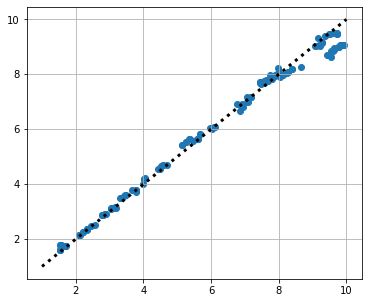

In [89]:
plt.scatter(Lmt_sim,Lmt)
plt.plot([1, 10], [1, 10], linestyle=':', linewidth=3, color='black')
plt.grid(True)

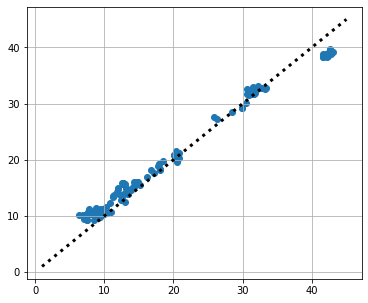

In [91]:
plt.scatter(Llt_sim,Llt)
plt.plot([1, 45], [1,45], linestyle=':', linewidth=3, color='black')
plt.grid(True)

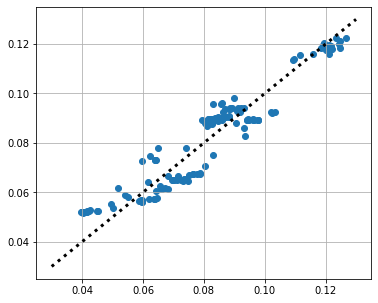

In [105]:
plt.scatter(R2_sim,R2)
plt.plot([0.03,0.13], [0.03,0.13], linestyle=':', linewidth=3, color='black')
plt.grid(True)

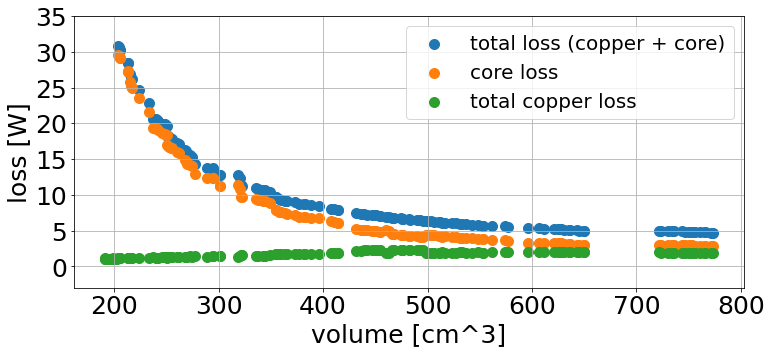

In [14]:
csv = pandas.read_csv("NSGA2_data_2021_08_17_v2.csv")

plt.scatter(csv["volume"], csv["total_loss"], s=100)
#plt.scatter(csv["volume"], csv["copperloss_tx"], s=100)
#plt.scatter(csv["volume"], csv["copperloss_rx"], s=100)
plt.scatter(csv["volume"], csv["coreloss"], s=100)
plt.scatter(csv["volume"], csv["copperloss_rx"]+csv["copperloss_tx"], s=100)

plt.xlabel("volume [cm^3]", fontsize=25)
plt.ylabel("loss [W]", fontsize=25)
plt.grid(True)

plt.legend(["total loss (copper + core)","core loss","total copper loss"],fontsize = 20)
plt.ylim(-3, 35)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
#plt.xlim(150, 950)

plt.rcParams["figure.figsize"] = (12,5)